In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from simulate import *
from f16system import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Run Simulation
xs = sim_gcas(
    T=500,
    dt=1/500,
    euler_steps=10,
    power=9,
    alpha=deg2rad(2.1215),
    beta=0.0,
    alt=600.0,
    vt=540.0,
    phi=-math.pi/8,
    theta=(-math.pi/2) * 0.3,
    psi=0.0,
    p=0.0,
    q=0.0,
    r=0.0,)

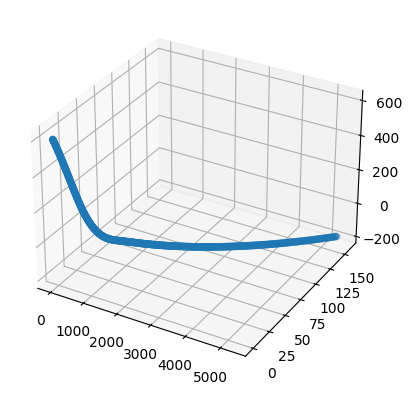

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs[:,9], xs[:,10], xs[:,11])

-183.26572


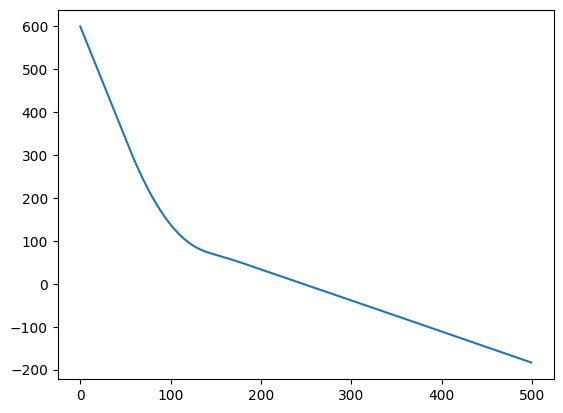

In [5]:
plt.plot(xs[:,11])
print(jnp.min(xs[:,11]))

Trajectory Log Likelihood: -98107576.0


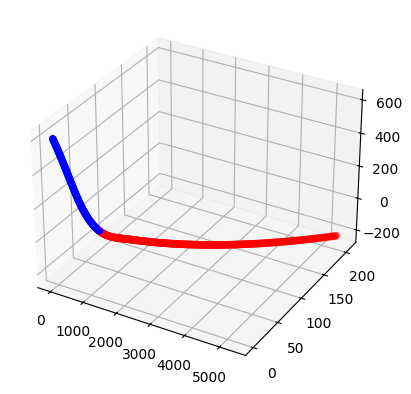

In [6]:
system = F16System(
    T=500,
    dt=1/500,
    euler_steps=10,
    power=9,
    alpha=deg2rad(2.1215),
    beta=0.0,
    alt=600.0,
    vt=540.0,
    phi=-math.pi/8,
    theta=(-math.pi/2) * 0.3,
    psi=0.0,
    p=0.0,
    q=0.0,
    r=0.0,)

# Rollout!
trajectory = system.rollout()

# Compute log-likelihood
log_likelihood = system.trajectory_log_likelihood(trajectory)
print("Trajectory Log Likelihood:", log_likelihood)

# Extract states and times
steps = trajectory.get_trajectory()
# Stack states into a 2D array.
states = jnp.stack([step.state for step in steps])
times = jnp.array([step.time for step in steps])
    
# Convert to numpy for plotting
states_np = np.array(states)
times_np = np.array(times)
    
altitudes = states_np[:, 11]
    
success_mask = altitudes >= CRASH_ALT
    
north = states_np[:, 9]
east = states_np[:, 10]

# Use blue for success, red for failure
colors = np.where(altitudes >= CRASH_ALT, 'blue', 'red')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(north, east, altitudes, c=colors)
plt.show()

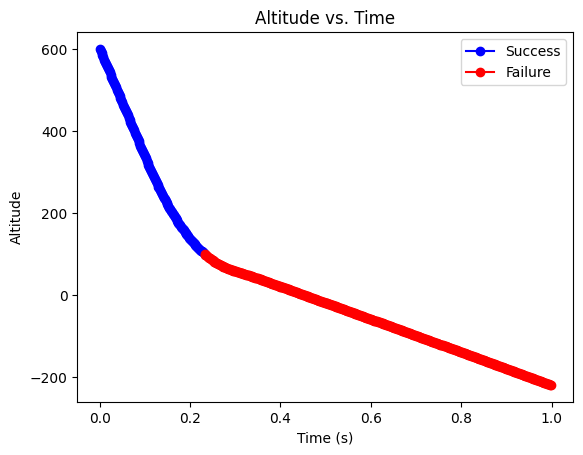

In [7]:
plt.figure()
# Use blue for success, red for failure
plt.plot(times_np[success_mask], altitudes[success_mask], 'bo-', label='Success')
plt.plot(times_np[~success_mask], altitudes[~success_mask], 'ro-', label='Failure')
plt.xlabel("Time (s)")
plt.ylabel("Altitude")
plt.title("Altitude vs. Time")
plt.legend()
plt.show()